# 이미지 크롤링 하기

### I. 크롬 드라이버 설치

#### 1. 크롬 버전 확인하기

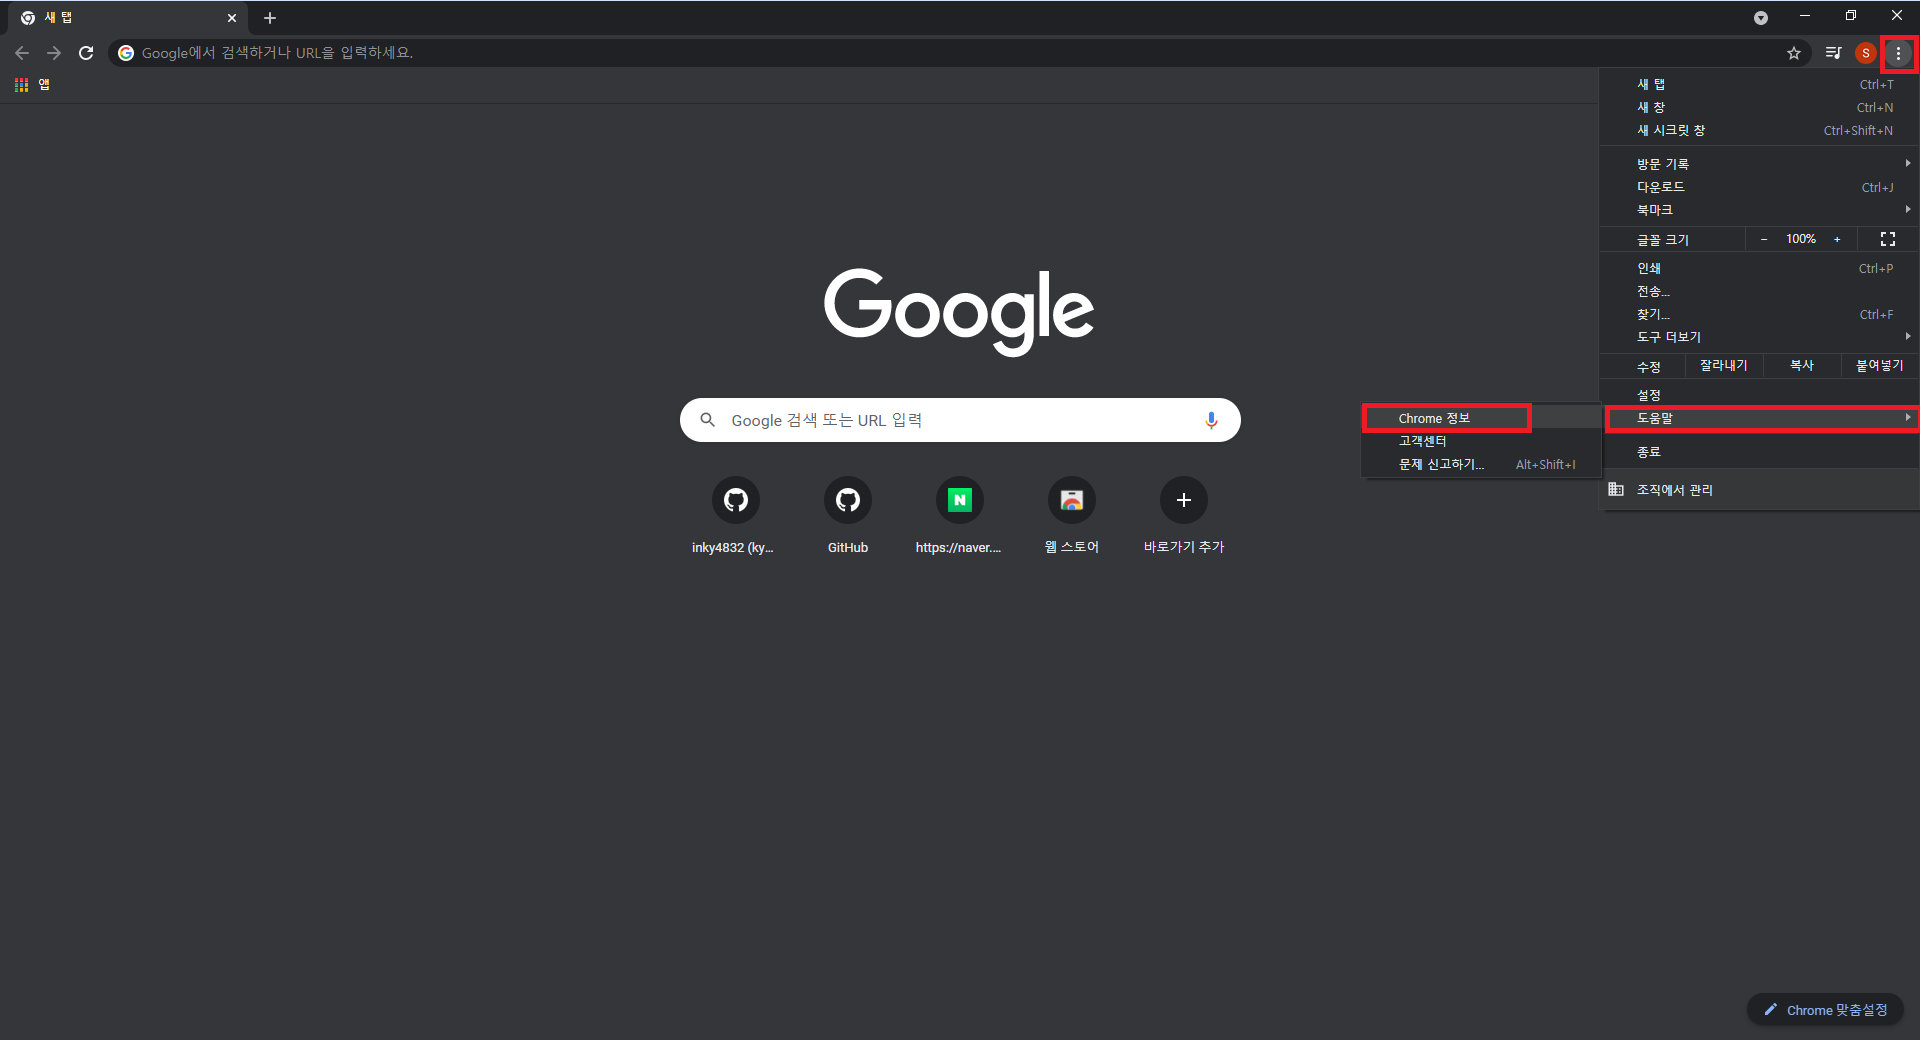

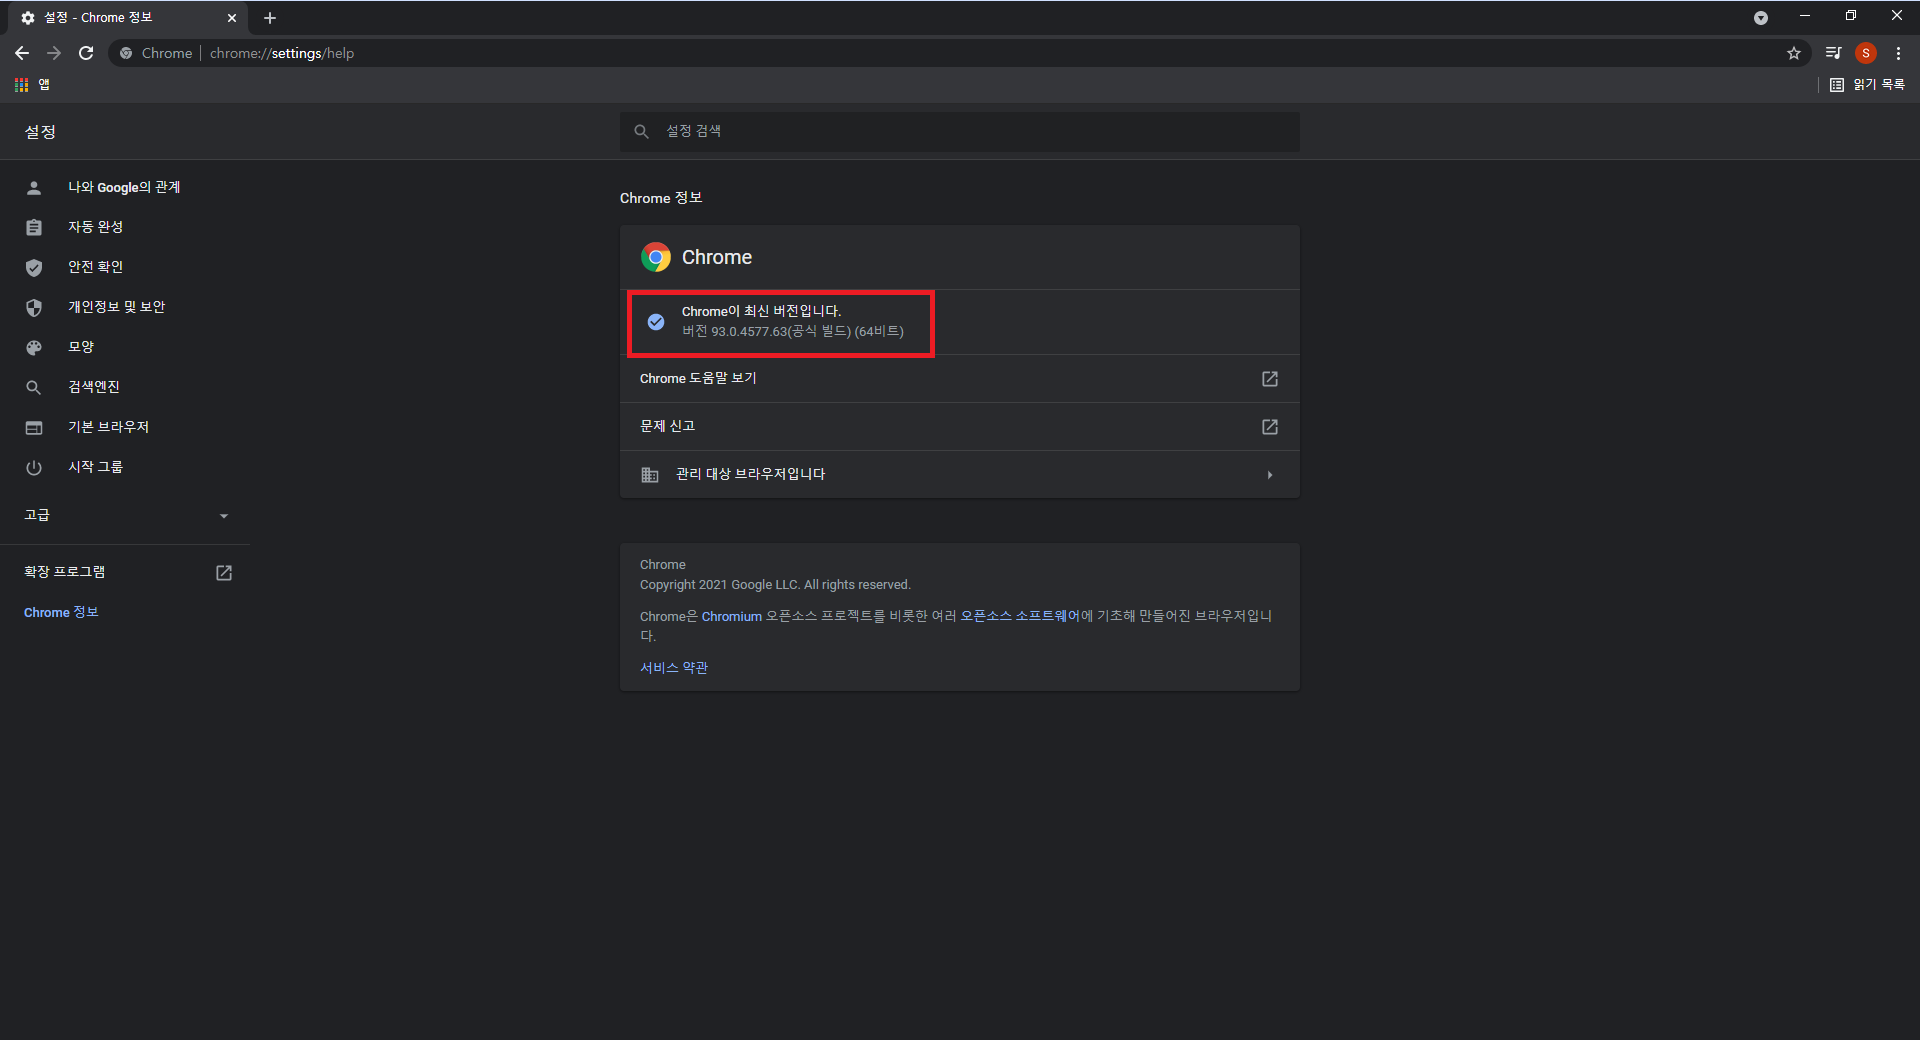

#### 2. 크롬드라이버 다운받기

https://chromedriver.chromium.org/downloads

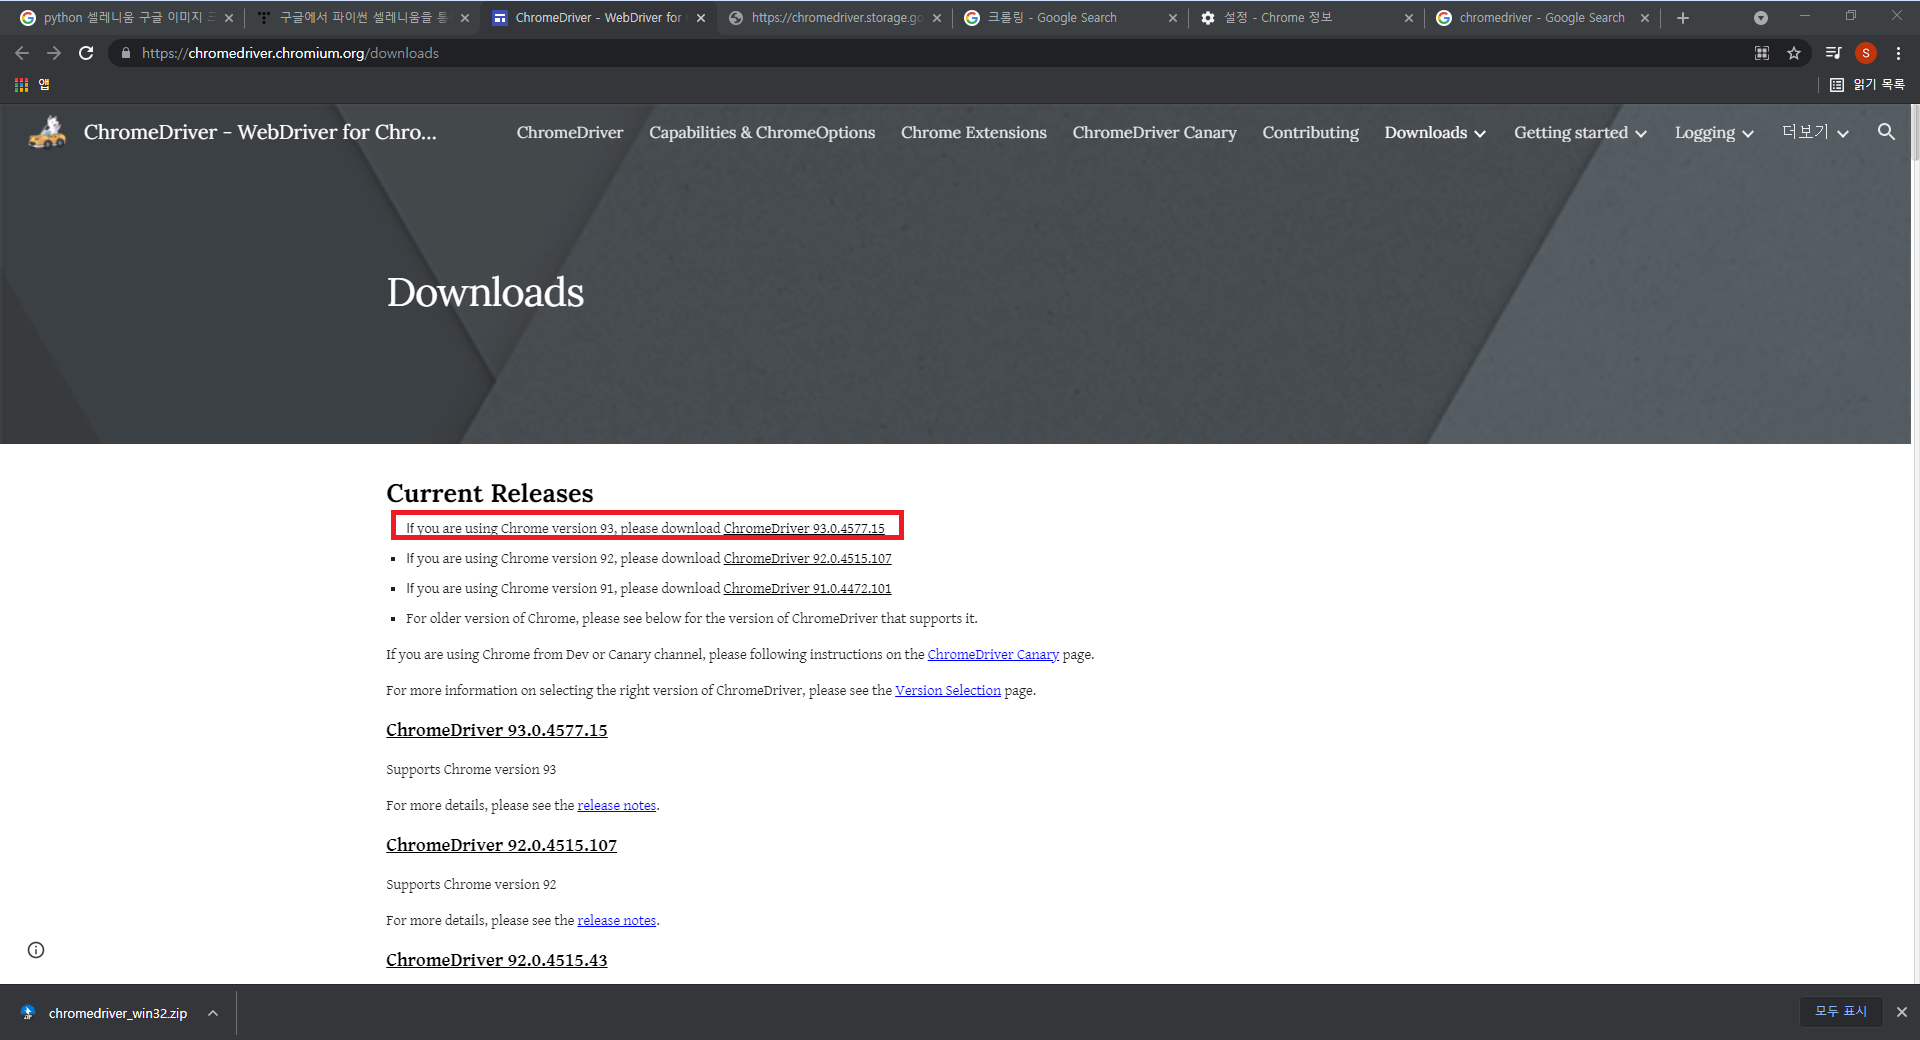

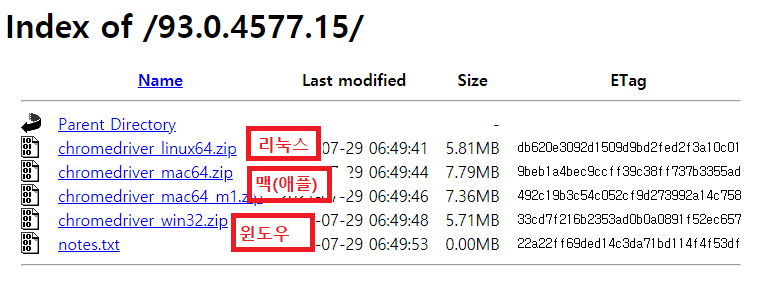

사용하시는 컴퓨터 OS환경에 따라 선택해서 설치하시면 됩니다.

### II. package 설치하기

In [1]:
!pip install selenium

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)


In [2]:
!pip install bs4

  Using cached bs4-0.0.1-py3-none-any.whl


### III. 코드 작성하기

In [3]:
from selenium import webdriver
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time
import urllib.request

In [ ]:
driver = webdriver.Chrome('D:\CJONS\chromedriver.exe') # 여기에 크롬드라이브 경로를 입력
driver.get("https://www.google.com/imghp?hl=ko&ogbl")
elem = driver.find_element_by_name("q") # 웹 페이지에서 검색창을 찾기. 구글에서 검색창의 name은 "q"이다.
elem.send_keys("damaged container") # 검색 키워드 입력
elem.send_keys(Keys.RETURN) # Enter

# 검색 후 모든 검색결과가 나올 수 있도록 스크롤을 끝까지 내리고 시작하기

SCROLL_PAUSE_TIME = 1
 
last_height = driver.execute_script("return document.body.scrollHeight")
 
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
 
    time.sleep(SCROLL_PAUSE_TIME)
 
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        try:
            driver.find_element_by_css_selector(".mye4qd").click()
        except:
            break
    last_height = new_height


images = driver.find_elements_by_css_selector(".rg_i.Q4LuWd")
count = 1
for img in images:
    try:
        img.click()
        time.sleep(4)
        img_url = driver.find_element_by_xpath('/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div/div[2]/a/img').get_attribute("src")
        urllib.request.urlretrieve(img_url, '.\images\\' + str(count) + ".jpg")
        count += 1
    except:
        pass
 
driver.close()